In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 51
dx = 1/(nx-1)
nt = 500
dt = 0.01
u = 0.1     # assume constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient
x = numpy.linspace(0,1,nx)

In [3]:
L = 1.0
C = x*100/L

(0, 100)

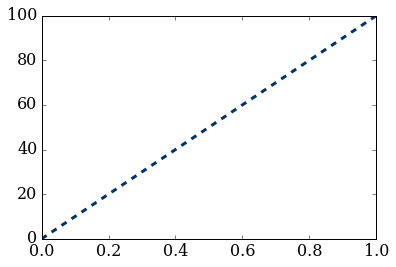

In [4]:
pyplot.plot(x, C, color='#003366', ls='--', lw=3)
pyplot.ylim(0,100)

In [5]:
for n in range(nt):
    
    Cn = C.copy()
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])

(0, 100)

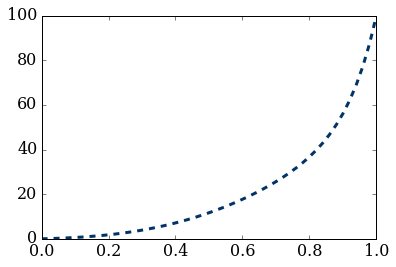

In [6]:
pyplot.plot(x, C, color='#003366', ls='--', lw=3)
pyplot.ylim(0,100)

In [7]:
from matplotlib import animation
from IPython.display import HTML

In [8]:
nx = 51
dx = 1/(nx-1)
nt = 500
dt = 0.01
u = 0.1     # assume constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient
x = numpy.linspace(0,1,nx)

In [9]:
L = 1.0
C = x*100/L

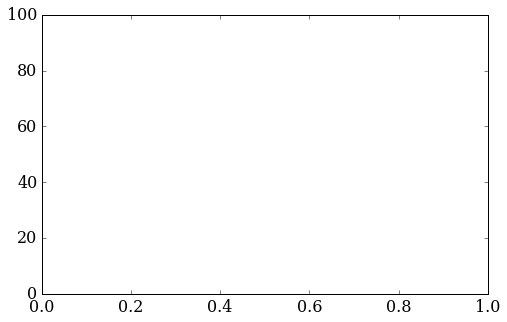

In [10]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,1), ylim=(0,100))
line = ax.plot([], [], color='#003366', ls='--', lw =3)[0]

In [11]:
def AD_equation(i):
    line.set_data(x,C)
    
    Cn = C.copy()
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])

In [12]:
anim = animation.FuncAnimation(fig, AD_equation,
                               frames=nt, interval=100)

In [13]:
HTML(anim.to_html5_video())